# Dataset inspection

We start be inspecting the dataset.

We check for missing values, outliers, data type of input variables, correlated variables...


In [1]:
IN_PATH = 'archive/'
OUT_PATH = 'data/'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
df_in = pd.read_csv(f'{IN_PATH}loan_approval.csv')

print(df_in.info())
print()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB
None



In [ ]:
print("N = ",len(df_in))
print("Unique names:",df_in['name'].nunique())  # Each name is unique, so we drop it
print("Droping 'name' column.")
print("Unique cities",df_in['city'].nunique())  # Many unique cities, but some repeatsA
print(df_in['city'].value_counts().head(10))
print("Droping 'cities' column.")
print()
df_clean = df_in.drop(columns=['name', 'city'])
df_y = df_clean['loan_approved']
df_X = df_clean.drop(columns=['loan_approved'])

print("Target variable distribution (%):")
print(df_y.value_counts()/len(df_y)*100) # Dataset is fairly balanced for the target variable

# Check for missing values in each column
for col in df_X.columns:
    if df_X[col].isna().sum() > 0:
        print(f"Column '{col}' has {df_X[col].isna().sum()} missing values.")
print(" No missing values found. ")

print("Output dataframe description:")
df_clean.describe(include='all')

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=666, stratify=df_y)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

print("Training set target distribution (%):")
print(y_train.value_counts()/len(y_train)*100)
print("Test set target distribution (%):")
print(y_test.value_counts()/len(y_test)*100)
# Save preprocessed data
X_train.to_csv(f'{OUT_PATH}X_train.csv', index=False)
X_test.to_csv(f'{OUT_PATH}/X_test.csv', index=False)
y_train.to_csv(f'{OUT_PATH}/y_train.csv', index=False)
y_test.to_csv(f'{OUT_PATH}/y_test.csv', index=False)
print(f"Preprocessed data saved to {OUT_PATH} directory.")


N =  2000
Unique names: 2000
Droping 'name' column.
Unique cities 1882
North Joseph        4
Williamsstad        3
West Elizabeth      3
Port Christopher    3
East Mary           3
Leeland             3
West Melissa        3
Christinachester    3
North David         3
Port Michael        3
Name: city, dtype: int64
Droping 'cities' column.

Target variable distribution (%):
False    56.05
True     43.95
Name: loan_approved, dtype: float64
 No missing values found. 
Output dataframe description:
Training set size: 1600, Test set size: 400
Training set target distribution (%):
False    56.0625
True     43.9375
Name: loan_approved, dtype: float64
Test set target distribution (%):
False    56.0
True     44.0
Name: loan_approved, dtype: float64
Preprocessed data saved to data/ directory.


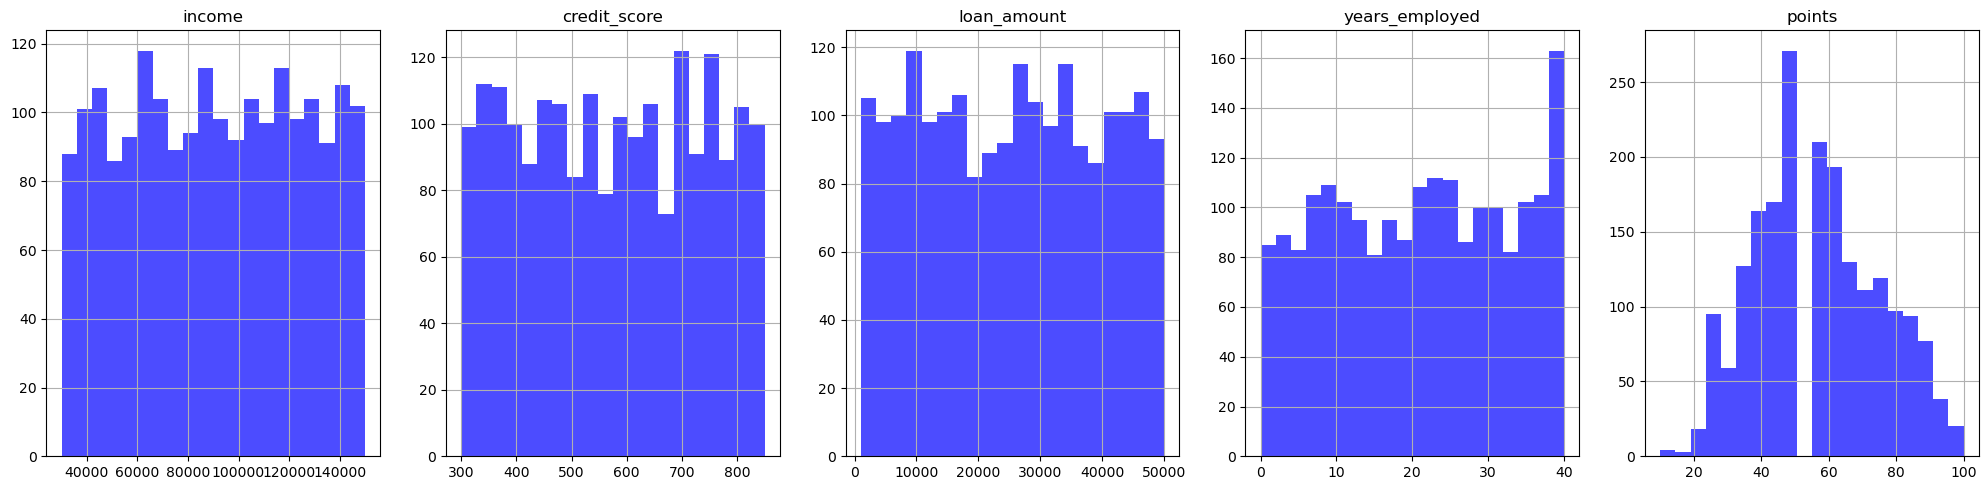

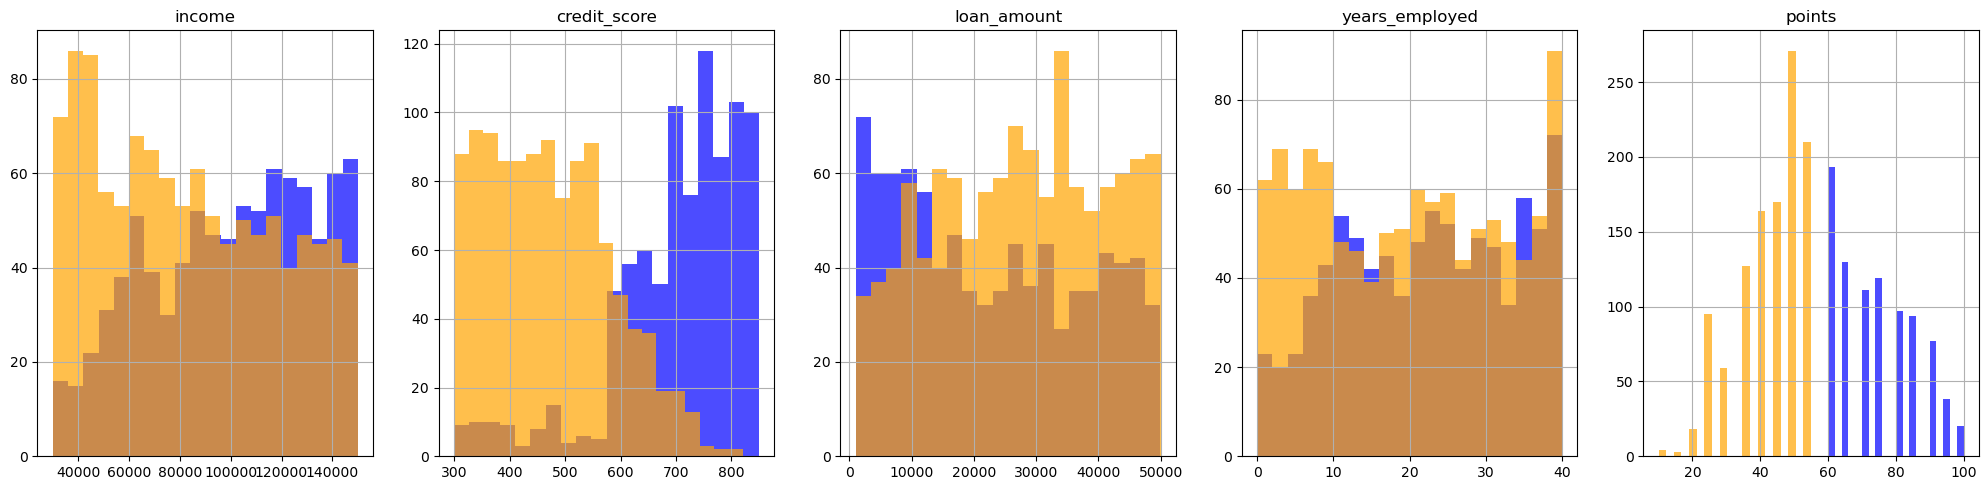

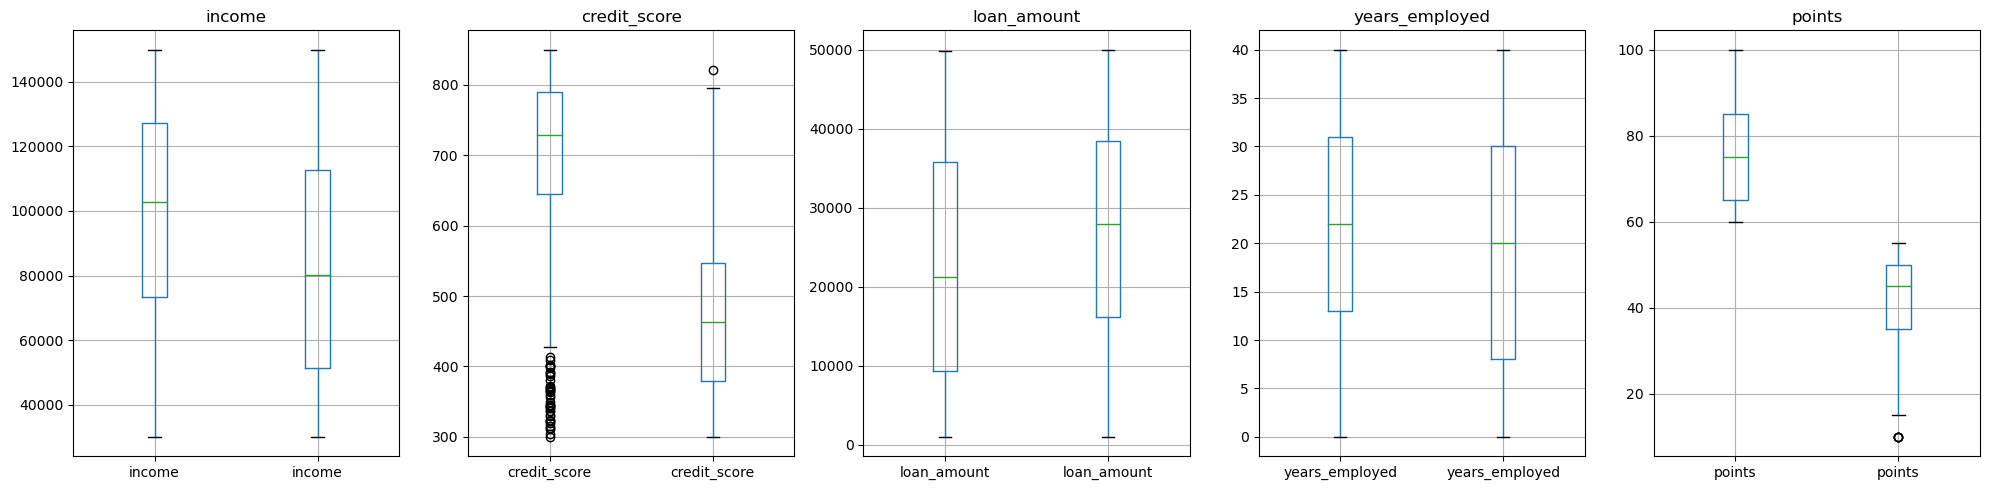

In [3]:

fig,ax = plt.subplots(1,len(df_X.select_dtypes(include=[np.number]).columns), figsize=(20,5))
for i,col in enumerate(df_X.select_dtypes(include=[np.number]).columns):
    df_X[col].hist(ax=ax[i], color='blue', alpha=0.7, bins=20)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

fig,ax = plt.subplots(1,len(df_X.select_dtypes(include=[np.number]).columns), figsize=(20,5))
for i,col in enumerate(df_X.select_dtypes(include=[np.number]).columns):
    df_X.loc[df_y][col].hist(ax=ax[i], color='blue', alpha=0.7, bins=20)
    df_X.loc[~df_y][col].hist(ax=ax[i], color='orange', alpha=0.7, bins=20)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

fig,ax = plt.subplots(1,len(df_X.select_dtypes(include=[np.number]).columns), figsize=(20,5))
for i,col in enumerate(df_X.select_dtypes(include=[np.number]).columns):
    #df_X[col].plot.box(ax=ax[i], vert=True)
    pd.concat([df_X.loc[df_y][col], df_X.loc[~df_y][col]], axis=1).boxplot(ax=ax[i])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()


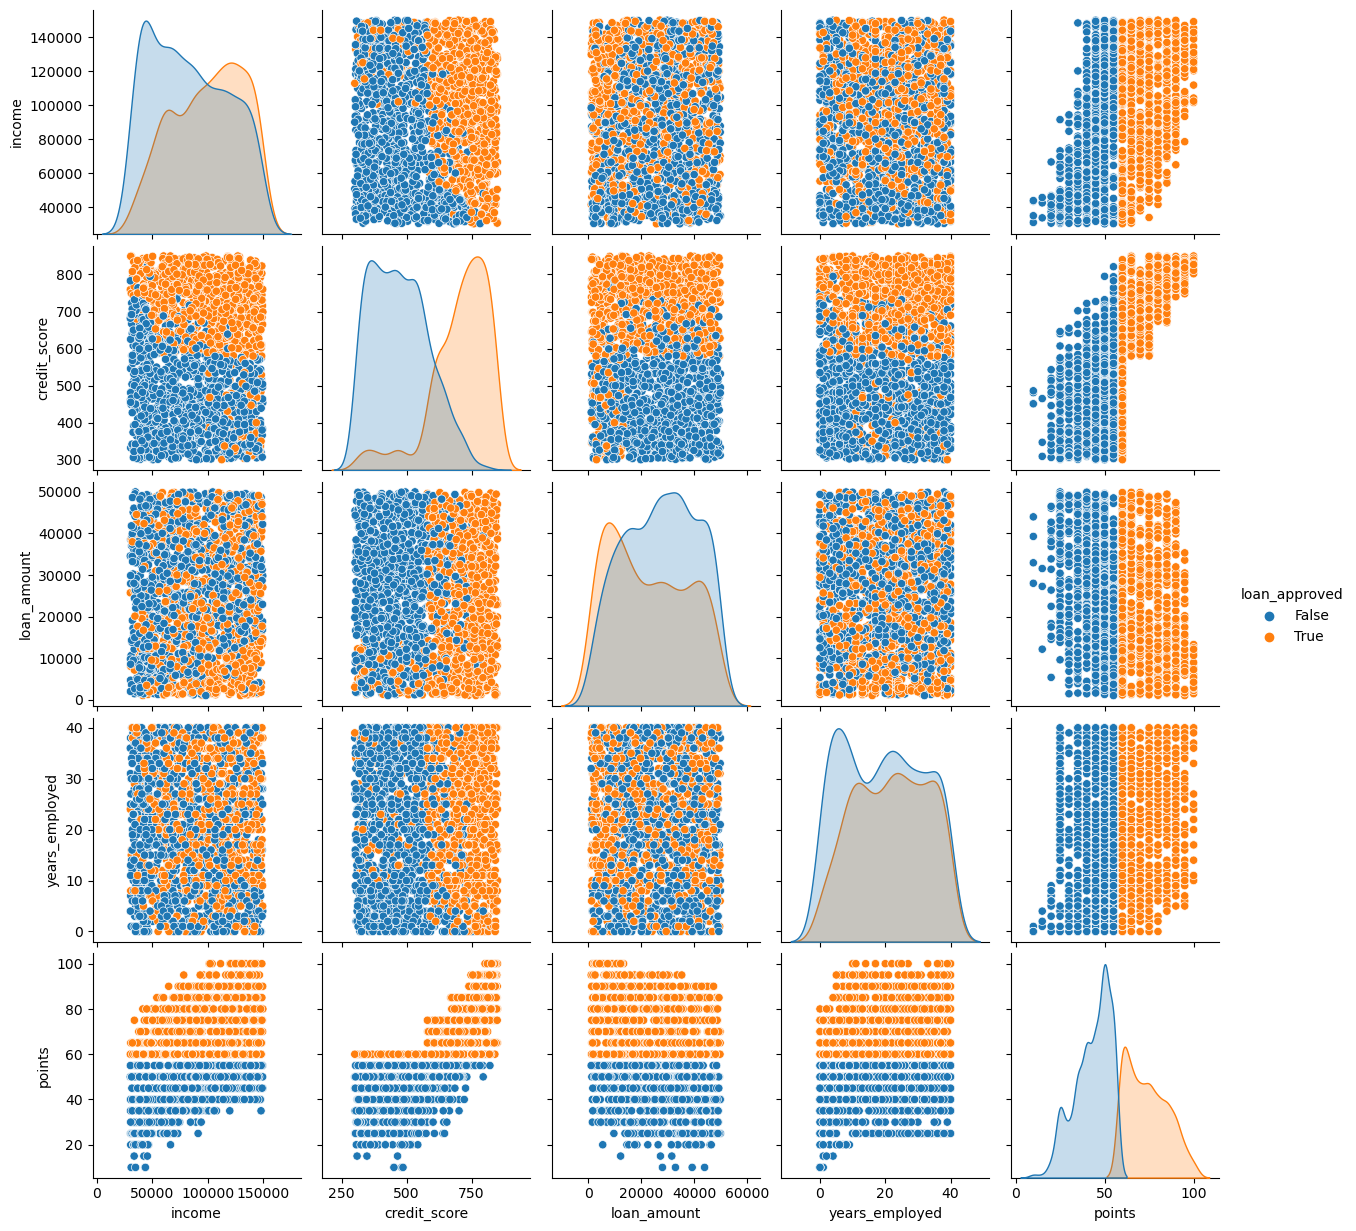

In [4]:
sns.pairplot(df_in, hue='loan_approved', diag_kind='kde')